In [1]:
from py2neo import authenticate, NodeSelector, Graph, Node, Relationship

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import networkx as nx
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# set up authentication parameters
authenticate("localhost:7474", "neo4j", "kombucha")

In [3]:
# connect to authenticated graph database
graph = Graph("http://localhost:7474/db/data/")

In [5]:
lang_dict = {'DE': 'German', 'EN': 'English', 'ES': 'Spanish', 'FA': 'Persian', 'RU': 'Russian', 'FR': 'French', \
                 'IT': 'Italian', 'JA': 'Japanese', 'PL': 'Polish', 'PT': 'Portuguese', 'ZH': 'Chinese'}
    

In [ ]:
def refs_stats(language_code):
    links_count = graph.data("""
        MATCH ()-[r1:REFERRED_TO]->(n1:Article {language_code: {lang_code} }) 
        RETURN toInt(r1.count) as refs_count;
        """, lang_code = language_code)

In [17]:
r= graph.data("""
        MATCH (n)-[r1:REFERRED_TO]->(n1:Article {language_code: {lang_code} }) 
        RETURN r1.count as weight, count(r1);
        """, lang_code = 'JA')
r

[{'count(r1)': 1, 'weight': '9816'},
 {'count(r1)': 6, 'weight': '6535'},
 {'count(r1)': 1, 'weight': '8265'},
 {'count(r1)': 2, 'weight': '9510'},
 {'count(r1)': 1, 'weight': '93546'},
 {'count(r1)': 1, 'weight': '9015'},
 {'count(r1)': 1, 'weight': '10481'},
 {'count(r1)': 3, 'weight': '8145'},
 {'count(r1)': 2, 'weight': '9009'},
 {'count(r1)': 288, 'weight': '590'},
 {'count(r1)': 3, 'weight': '10667'},
 {'count(r1)': 2, 'weight': '10340'},
 {'count(r1)': 209, 'weight': '776'},
 {'count(r1)': 1, 'weight': '30120'},
 {'count(r1)': 428, 'weight': '470'},
 {'count(r1)': 2, 'weight': '12085'},
 {'count(r1)': 2, 'weight': '9525'},
 {'count(r1)': 1, 'weight': '8655'},
 {'count(r1)': 1, 'weight': '20911'},
 {'count(r1)': 1, 'weight': '13797'},
 {'count(r1)': 1, 'weight': '15225'},
 {'count(r1)': 1, 'weight': '14355'},
 {'count(r1)': 51, 'weight': '1645'},
 {'count(r1)': 48, 'weight': '1510'},
 {'count(r1)': 1, 'weight': '23381'},
 {'count(r1)': 20, 'weight': '2499'},
 {'count(r1)': 1, 'we

In [19]:
len(r)

15967

In [20]:
df_r = pd.DataFrame(r)
df_r.head()

,count(r1),weight
0,1,9816
1,6,6535
2,1,8265
3,2,9510
4,1,93546


In [23]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15967 entries, 0 to 15966
Data columns (total 2 columns):
count(r1)    15967 non-null int64
weight       15967 non-null object
dtypes: int64(1), object(1)
memory usage: 249.6+ KB


In [24]:
df_r.describe()

,count(r1)
count,15967.000000
mean,143.792885
std,1813.514381
min,1.000000
25%,1.000000
50%,2.000000
75%,9.000000
max,82977.000000


In [25]:
df_r['count(r1)'][:5]

0    1
1    6
2    1
3    2
4    1
Name: count(r1), dtype: int64

In [26]:
df_r['weight'][:5]

0     9816
1     6535
2     8265
3     9510
4    93546
Name: weight, dtype: object

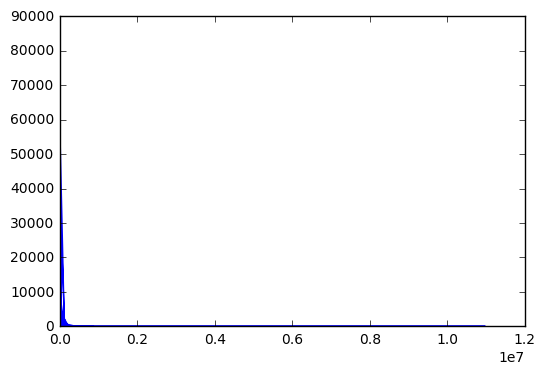

In [27]:
plt.plot(df_r['weight'], df_r['count(r1)'])

In [28]:
len(df_r['count(r1)'][df_r['count(r1)'] > 1])

9596

In [36]:
df_r2 = df_r[df_r['count(r1)'] > 500]

In [37]:
df_r2.describe()

,count(r1)
count,421.000000
mean,4812.287411
std,10123.572968
min,502.000000
25%,776.000000
50%,1419.000000
75%,3654.000000
max,82977.000000


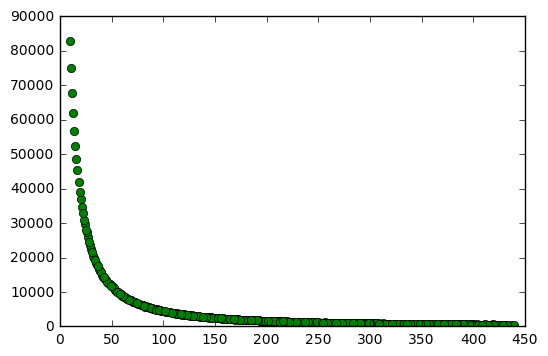

In [38]:
plt.plot(df_r2['weight'], df_r2['count(r1)'], 'go')

In [13]:
r= graph.data("""
        MATCH (n)-[r1:REFERRED_TO]->(n1:Article {language_code: {lang_code} }) 
        RETURN labels(n), r1.type, count(r1);
        """, lang_code = 'JA')
r

[{'count(r1)': 1377, 'labels(n)': ['Article'], 'r1.type': 'other'},
 {'count(r1)': 2190223,
  'labels(n)': ['ExternalSource'],
  'r1.type': 'external'},
 {'count(r1)': 104341, 'labels(n)': ['Article'], 'r1.type': 'link'}]

In [14]:
pd.DataFrame(r)

,count(r1),labels(n),r1.type
0,1377,[Article],other
1,2190223,[ExternalSource],external
2,104341,[Article],link


In [15]:
r= graph.data("""
        MATCH (n)-[r1:REFERRED_TO]->(n1:Article {language_code: {lang_code} }) 
        RETURN labels(n), r1.type, count(r1);
        """, lang_code = 'RU')
pd.DataFrame(r)

,count(r1),labels(n),r1.type
0,2747,[Article],other
1,2549682,[ExternalSource],external
2,159622,[Article],link


In [ ]:
def degree_counts(language_code):
    
    links_count = graph.data("""
        MATCH ()-[r1:REFERRED_TO]->(n1:Article {language_code: {lang_code} }) 
        RETURN count(r1) as links_count;
        """, lang_code = language_code)
    
    references_count = graph.data("""
        MATCH ()-[r1:REFERRED_TO]->(n1:Article {language_code: {lang_code} }) 
        RETURN sum(toInt(r1.count)) as references_count;
        """, lang_code = language_code)
    
    # average degree
    degree_avg = links_count[0]['links_count']*1.0/(articles_count[0]['articles_count'] + \
                                                    external_sources_count[0]['external_sources_count'])
    # average weighted degree
    weighted_degree_avg = references_count[0]['references_count']*1.0/(articles_count[0]['articles_count'] + \
                                                                       external_sources_count[0]['external_sources_count'])
    
    # average references per link
    refs_per_link_avg = references_count[0]['references_count']*1.0/links_count[0]['links_count']
    
    d = dict({'language': lang_dict[language_code]}, **articles_count[0], **external_sources_count[0], \
            **links_count[0], **references_count[0])
    d['degree_avg'] = degree_avg
    d['weighted_degree_avg'] = weighted_degree_avg
    d['refs_per_link_avg'] = refs_per_link_avg
    return d

In [4]:
articles_count = graph.data("""
        MATCH (n1:Article {language_code: {lang_code} }) 
        RETURN count(n1) as articles_count;
        """, lang_code = 'DE')
articles_count

[{'articles_count': 1307048}]